# Interpretability 11: sparse initialization

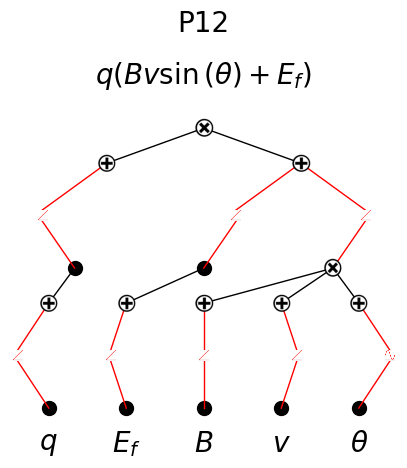

In [1]:
from kan.compiler import sf2kan
from kan.feynman import get_feynman_dataset
from kan.utils import create_dataset, ex_round
import torch
from kan.MultKAN import MultKAN
from sympy import *

torch.set_default_dtype(torch.float64)
torch.use_deterministic_algorithms(True)

problem_id = 12
input_variables, expr, f, ranges = get_feynman_dataset(problem_id)
n_var = len(input_variables)
model = sf2kan(input_variables, expr, grid=10, k=3)

dataset = create_dataset(f, n_var=n_var, ranges=ranges)
model(dataset['train_input'], singularity_avoiding=True)
model.plot(in_vars=input_variables, out_vars=[expr], beta=10000, title='P{}'.format(problem_id))

In [2]:
model = MultKAN([5,[3,1],[0,1]], mult_arity=[[],[3],[2]], grid=3, k=3, seed=0, base_fun='identity', sparse_init=True, noise_scale=1.0, ckpt_path='./P12')

Directory already exists: ./P12


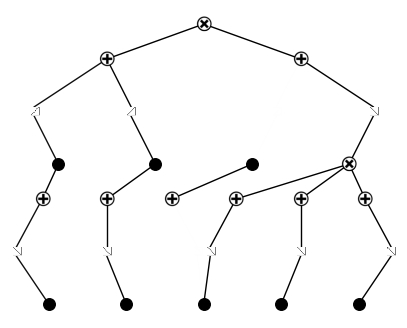

In [3]:
model(dataset['train_input'])
model.plot()

In [4]:
model.train(dataset, opt="LBFGS", steps=100, lamb=1e-4, lamb_coef=1.0);

train loss: 7.70e-03 | test loss: 9.69e-03 | reg: 1.29e+01 : 100%|█| 100/100 [01:06<00:00,  1.51it/s


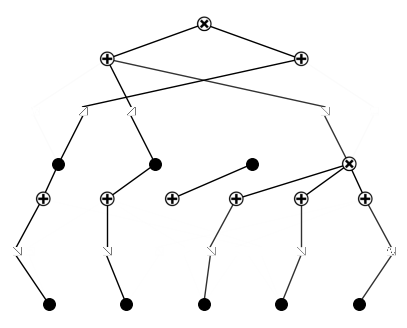

In [5]:
model.plot(beta=3)

In [6]:
model = model.prune()

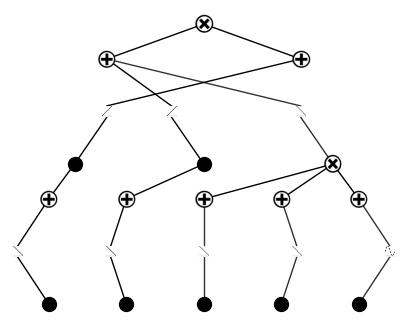

In [7]:
model.plot()

In [8]:
model.auto_symbolic()

fixing (0,0,0) with x, r2=0.9999979150782834, c=1
fixing (0,0,1) with 0, r2=-100000000.0, c=0
fixing (0,0,2) with 0, r2=-100000000.0, c=0
fixing (0,0,3) with 0, r2=-100000000.0, c=0
fixing (0,0,4) with 0, r2=-100000000.0, c=0
fixing (0,1,0) with 0, r2=-100000000.0, c=0
fixing (0,1,1) with tan, r2=0.9999936863649151, c=2
fixing (0,1,2) with 0, r2=-100000000.0, c=0
fixing (0,1,3) with 0, r2=-100000000.0, c=0
fixing (0,1,4) with 0, r2=-100000000.0, c=0
fixing (0,2,0) with 0, r2=-100000000.0, c=0
fixing (0,2,1) with 0, r2=-100000000.0, c=0
fixing (0,2,2) with x, r2=0.9993636064566506, c=1
fixing (0,2,3) with 0, r2=-100000000.0, c=0
fixing (0,2,4) with 0, r2=-100000000.0, c=0
fixing (0,3,0) with 0, r2=-100000000.0, c=0
fixing (0,3,1) with 0, r2=-100000000.0, c=0
fixing (0,3,2) with 0, r2=-100000000.0, c=0
fixing (0,3,3) with x, r2=0.9996979180008072, c=1
fixing (0,3,4) with 0, r2=-100000000.0, c=0
fixing (0,4,0) with 0, r2=-100000000.0, c=0
fixing (0,4,1) with 0, r2=-100000000.0, c=0
fixing

In [9]:
model.unfix_symbolic(0,1,1)
model.fix_symbolic(0,1,1,'x')
model.unfix_symbolic(1,1,0)
model.fix_symbolic(1,1,0,'x')

Best value at boundary.
r2 is 0.9998565444586908
Best value at boundary.
r2 is 0.9998727075938469


tensor(0.9999)

In [10]:
model.train(dataset, opt="LBFGS", steps=100);

train loss: 8.49e-11 | test loss: 8.39e-11 | reg: 0.00e+00 : 100%|█| 100/100 [00:09<00:00, 10.88it/s


In [11]:
sf = model.symbolic_formula(var=input_variables)[0][0]
sf

1.0*(6.83579304272541e-11 - 2.49694219835062*q)*(-0.400489847469402*E_f - 1.66784285791585*(-0.630201415640881*B - 8.90496002674615e-11)*(-1.50346887751584*v - 3.17379694574071e-11)*(0.253432649888235*sin(0.999999999861801*theta + 5.36656980547405e-10) + 8.22262570532306e-12) - 1.9070718962344e-11)

In [12]:
simplify(nsimplify(ex_round(ex_round(ex_round(ex_round(sf, 5), 5), 3), 2)))

q*(B*v*sin(theta) + E_f)